# Rice Classifier with FastAI

Some files are not shown for security reasons but the txt file of the urls I use will be given

In [7]:
from pathlib import Path
import pathlib
from serpapi import GoogleSearch
import json
import requests
import os
import torch
import joblib
import pandas as pd
import numpy as np
import fastai
# from fastai.basics import *
# from fastai.callback.all import *P
from fastai.metrics import error_rate, accuracy
from fastai.vision import *
from fastai.vision.all import *


datapath = Path('./data')

In [3]:
def download_images_from_json(path, cls, tag):
    with open(path, 'r') as jsonfile:
        search = json.load(jsonfile)

    results = dict(search)

    image_results = []
    for image in results[cls]:
        image_results.append(image[tag])
    
    return image_results

In [9]:
rice_labels = {
    'arborio': 'cooked uncooked arborio rice',
    'sushi': 'Japanese short grain cooked uncooked rice',
    'spanish': 'bomba uncooked rice'
}

rice_labels2 = {
    'arborio': 'cooked uncooked arborio rice',
    'sushi': 'Japanese short grain cooked uncooked rice',
    'spanish': 'valencia uncooked rice',
    'jasmine': 'jasmine rice',
    'basmati': 'basmati rice'
}

In [5]:
bs = 64

In [6]:
fns = get_image_files(datapath)
fns

(#1160) [Path('data/arborio/0017cbaa-125d-4a69-aa0e-2c0c15f5f462.jpg'),Path('data/arborio/00e4ad53-9787-4c09-8913-ddd7225fa936.jpg'),Path('data/arborio/06abf4dd-83a0-4158-a0c9-1d4419c9b24d.jpg'),Path('data/arborio/0c89d6bc-480f-43ba-9be5-485a18c74fcb.jpg'),Path('data/arborio/0e8602b1-8551-4af4-a648-02bf4280fcbe.jpg'),Path('data/arborio/11677eab-6580-4a9c-aab5-fc370e7fe19f.jpg'),Path('data/arborio/1761968a-d487-4588-87cf-4cac3c51fdda.jpg'),Path('data/arborio/178caa59-d478-4469-92ec-51081f5cede4.jpg'),Path('data/arborio/1a5b1411-ad3f-45d8-88e6-cf9cc48ec50a.jpg'),Path('data/arborio/1d6dfe15-2379-4feb-b7e4-77d7d7c006d2.jpg')...]

In [7]:
failed = verify_images(fns)
failed

(#0) []

In [8]:
failed.map(Path.unlink)

(#0) []

In [9]:
dls = ImageDataLoaders.from_folder(
    datapath,
    valid_pct=0.2, 
    item_tfms=RandomResizedCrop(224, min_scale=.5), 
    batch_tfms=aug_transforms(), 
    bs=bs
)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


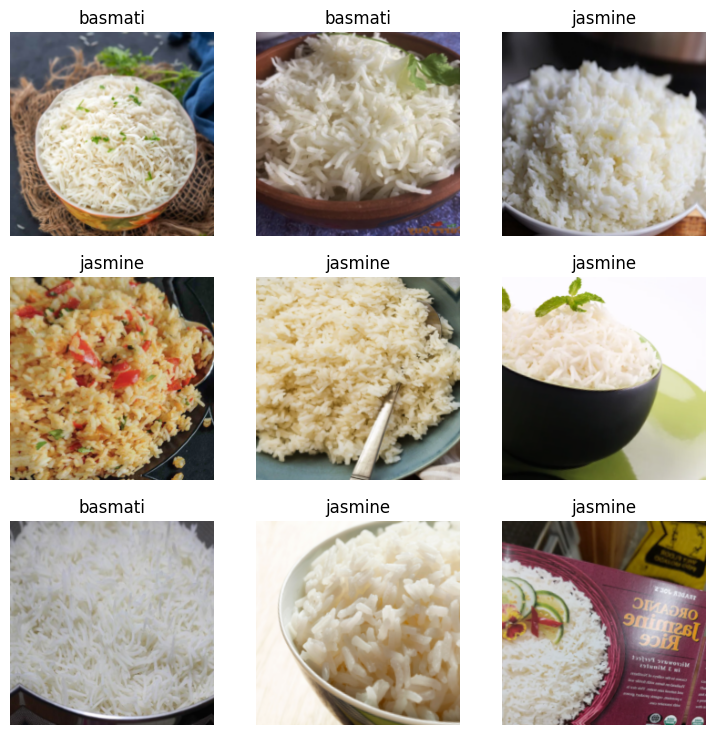

In [10]:
dls.show_batch()

In [27]:
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

trained_learn = load_learner('learn_fine_model.pkl')
trained_learn.dls = dls

pathlib.PosixPath = temp

In [28]:
cleaner = widgets.ImageClassifierCleaner(trained_learn)
cleaner

c:\Users\Waylo\.virtualenvs\AI_env\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Waylo\.virtualenvs\AI_env\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


In [71]:
for each in cleaner.delete():
    cleaner.fns[each].unlink()

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'data\\sushi\\94bdf398-1df4-4bab-b90f-202976bea005.jpg'

In [72]:
for each, cat in cleaner.change():
    os.rename(cleaner.fns[each], Path(datapath/cat/cleaner.fns[each].name))

Type:        module
String form: <module 'fastai.vision' from 'c:\\Users\\Waylo\\.virtualenvs\\AI_env\\lib\\site-packages\\fastai\\vision\\__init__.py'>
File:        c:\users\waylo\.virtualenvs\ai_env\lib\site-packages\fastai\vision\__init__.py
Docstring:   <no docstring>
